In [15]:
from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()

# Baca excel
df = pd.read_excel("makanan matdis.xlsx")
(df.head())

Saving makanan matdis.xlsx to makanan matdis (1).xlsx


,makanan,kenyang,sehat,rasa,bosan,harga
0,ayamgeprek,0.9,0.5,0.7,0.2,15000
1,nasipadang,1.0,0.8,0.9,0.5,17000
2,mieayam,1.0,0.6,0.9,0.3,10000
3,bakso,0.7,0.3,1.0,0.3,10000
4,cireng,0.5,0.4,0.8,0.7,10000


In [16]:
df

,makanan,kenyang,sehat,rasa,bosan,harga
0,ayamgeprek,0.9,0.5,0.7,0.2,15000
1,nasipadang,1.0,0.8,0.9,0.5,17000
2,mieayam,1.0,0.6,0.9,0.3,10000
3,bakso,0.7,0.3,1.0,0.3,10000
4,cireng,0.5,0.4,0.8,0.7,10000
5,nasigoreng,0.8,0.7,1.0,0.5,14000
6,seblak,0.6,0.2,0.8,0.8,15000
7,gorengan,0.5,0.2,0.5,0.5,10000
8,capcay,0.6,0.9,0.8,0.4,15000
9,mieinstan,0.5,0.1,0.7,0.2,10000


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [18]:
# Konversi DataFrame ke dictionary
makan = {
    'makanan': df['makanan'].values,
    'kenyang': df['kenyang'].values,
    'sehat': df['sehat'].values,
    'rasa': df['rasa'].values,
    'bosan': df['bosan'].values,
    'harga': df['harga'].values
}

print(f"Data makanan berhasil dimuat: {len(makan['makanan'])} jenis makanan")
print("Daftar makanan:", list(makan['makanan']))

Data makanan berhasil dimuat: 15 jenis makanan
Daftar makanan: ['ayamgeprek', 'nasipadang', 'mieayam', 'bakso', 'cireng', 'nasigoreng', 'seblak', 'gorengan', 'capcay', 'mieinstan ', 'roti', 'nasitelur', 'warteg', 'soto', 'sate']


In [19]:
# Parameter konfigurasi
budget = 1e6  # rupiah
wkenyang_base = 0.8
wrasa_base = 0.7
wsehat_base = 0.9
wbosan_base = 0.2

SAMPLE_NUM = 500
sampleid = np.arange(0, SAMPLE_NUM)

# Inisialisasi arrays hasil
skor = np.zeros(SAMPLE_NUM, dtype=np.double)
sisa = np.zeros(SAMPLE_NUM, dtype=np.double)
sehat = np.zeros(SAMPLE_NUM, dtype=np.double)

# Parameter untuk binning sisa uang
SISA_MINIMUM = 150e3
SISA_MAKSIMUM = 300e3
bin_sisa = np.arange(SISA_MINIMUM, SISA_MAKSIMUM, 1000)

# Arrays untuk response
resp_sehat = np.zeros((SAMPLE_NUM, len(bin_sisa)), dtype=np.double)
resp_pilih = np.zeros((SAMPLE_NUM, 62), dtype=np.double)

print(f"Mulai simulasi {SAMPLE_NUM} sample...")

# Main simulation loop
for n in range(0, SAMPLE_NUM):
    budget_current = 1e6
    skor_kumulatif = 0
    skor_sehat = 0

    for i in range(0, 31):  # hari
        # Makan pertama (pagi)
        pilihan = np.random.randint(0, len(makan['makanan']))

        w_kenyang = np.random.normal(loc=wkenyang_base, scale=0.2)
        w_rasa = np.random.normal(loc=wrasa_base, scale=0.2)
        w_sehat = np.random.normal(loc=wsehat_base, scale=0.4)
        w_bosan = np.random.normal(loc=wbosan_base, scale=0.2)

        skor_kumulatif = skor_kumulatif + \
            w_kenyang * makan['kenyang'][pilihan] \
            + w_rasa * makan['rasa'][pilihan] \
            + w_sehat * makan['sehat'][pilihan] \
            - w_bosan * makan['bosan'][pilihan]

        skor_sehat += makan['sehat'][pilihan] - makan['bosan'][pilihan]
        budget_current = budget_current - makan['harga'][pilihan]
        resp_pilih[n][2*i] = pilihan

        # Makan kedua (malam)
        pilihan = np.random.randint(0, len(makan['makanan']))

        w_kenyang = np.random.normal(loc=wkenyang_base, scale=0.2)
        w_rasa = np.random.normal(loc=wrasa_base, scale=0.2)
        w_sehat = np.random.normal(loc=wsehat_base+0.2, scale=0.4)
        w_bosan = np.random.normal(loc=wbosan_base*2, scale=0.2)

        skor_kumulatif = skor_kumulatif + \
            w_kenyang * makan['kenyang'][pilihan] \
            + w_rasa * makan['rasa'][pilihan] \
            + w_sehat * makan['sehat'][pilihan] \
            - w_bosan * makan['bosan'][pilihan]

        skor_sehat += makan['sehat'][pilihan] - makan['bosan'][pilihan]
        budget_current = budget_current - makan['harga'][pilihan]
        resp_pilih[n][2*i+1] = pilihan

    # Simpan hasil
    sisa[n] = budget_current
    skor[n] = skor_kumulatif
    sehat[n] = skor_sehat

    # Update resp_sehat untuk plotting
    if SISA_MINIMUM <= budget_current < SISA_MAKSIMUM:
        bin_idx = int((budget_current - SISA_MINIMUM) / 1000)
        if 0 <= bin_idx < len(bin_sisa):
            resp_sehat[n][bin_idx] = skor_sehat

print("Simulasi selesai!")
print(f"Range skor kesehatan: {np.min(sehat):.2f} hingga {np.max(sehat):.2f}")
print(f"Range sisa budget: Rp {np.min(sisa):,.0f} hingga Rp {np.max(sisa):,.0f}")

Mulai simulasi 500 sample...
Simulasi selesai!
Range skor kesehatan: -2.50 hingga 13.90
Range sisa budget: Rp 129,000 hingga Rp 292,000


In [20]:
print("1. ANALISIS POLA DENGAN KESEHATAN POSITIF")

# Cari pola makan dengan nilai kumulatif kesehatan (resp_sehat) positif
positive_health_idx = np.where(sehat > 0)[0]
negative_health_idx = np.where(sehat <= 0)[0]

print(f"Pola dengan kesehatan positif: {len(positive_health_idx)} dari {SAMPLE_NUM}")
print(f"Pola dengan kesehatan non-positif: {len(negative_health_idx)} dari {SAMPLE_NUM}")
print(f"Persentase kesehatan positif: {len(positive_health_idx)/SAMPLE_NUM*100:.1f}%")

if len(positive_health_idx) > 0:
    print(f"\nStatistik pola dengan kesehatan positif:")
    print(f"- Skor kesehatan rata-rata: {np.mean(sehat[positive_health_idx]):.2f}")
    print(f"- Skor kumulatif rata-rata: {np.mean(skor[positive_health_idx]):.2f}")
    print(f"- Sisa budget rata-rata: Rp {np.mean(sisa[positive_health_idx]):,.0f}")

    # Top 10 pola dengan kesehatan terbaik
    top_health_idx = positive_health_idx[np.argsort(sehat[positive_health_idx])[::-1][:10]]
    print(f"\nTop 10 pola dengan kesehatan terbaik:")
    for i, idx in enumerate(top_health_idx):
        print(f"{i+1:2d}. Sample #{idx:3d}: Kesehatan={sehat[idx]:6.2f}, Skor={skor[idx]:7.2f}, Sisa=Rp{sisa[idx]:8.0f}")

1. ANALISIS POLA DENGAN KESEHATAN POSITIF
Pola dengan kesehatan positif: 493 dari 500
Pola dengan kesehatan non-positif: 7 dari 500
Persentase kesehatan positif: 98.6%

Statistik pola dengan kesehatan positif:
- Skor kesehatan rata-rata: 5.88
- Skor kumulatif rata-rata: 94.79
- Sisa budget rata-rata: Rp 216,290

Top 10 pola dengan kesehatan terbaik:
 1. Sample #342: Kesehatan= 13.90, Skor= 105.11, Sisa=Rp  202000
 2. Sample # 39: Kesehatan= 13.50, Skor= 104.83, Sisa=Rp  172000
 3. Sample #426: Kesehatan= 13.40, Skor= 104.79, Sisa=Rp  146000
 4. Sample #101: Kesehatan= 13.40, Skor= 101.76, Sisa=Rp  184000
 5. Sample # 89: Kesehatan= 12.80, Skor= 103.97, Sisa=Rp  182000
 6. Sample # 28: Kesehatan= 11.60, Skor= 101.96, Sisa=Rp  170000
 7. Sample #203: Kesehatan= 11.50, Skor= 102.93, Sisa=Rp  169000
 8. Sample #446: Kesehatan= 11.30, Skor=  98.25, Sisa=Rp  161000
 9. Sample #324: Kesehatan= 11.20, Skor= 103.38, Sisa=Rp  188000
10. Sample #320: Kesehatan= 11.00, Skor= 100.97, Sisa=Rp  20700

Sebanyak 98.6% pola makan memiliki skor kesehatan positif, menunjukkan mayoritas pola tergolong sehat.

Skor kesehatan dihitung dari selisih antara nilai sehat dan bosan.

Pola #342 memiliki skor kesehatan tertinggi (13.90) dengan sisa budget Rp 202.000.

Hanya 1.4% pola yang tidak sehat, menandakan dataset makanan seimbang dan berkualitas baik.

/tmp/ipython-input-1700093001.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=labels)


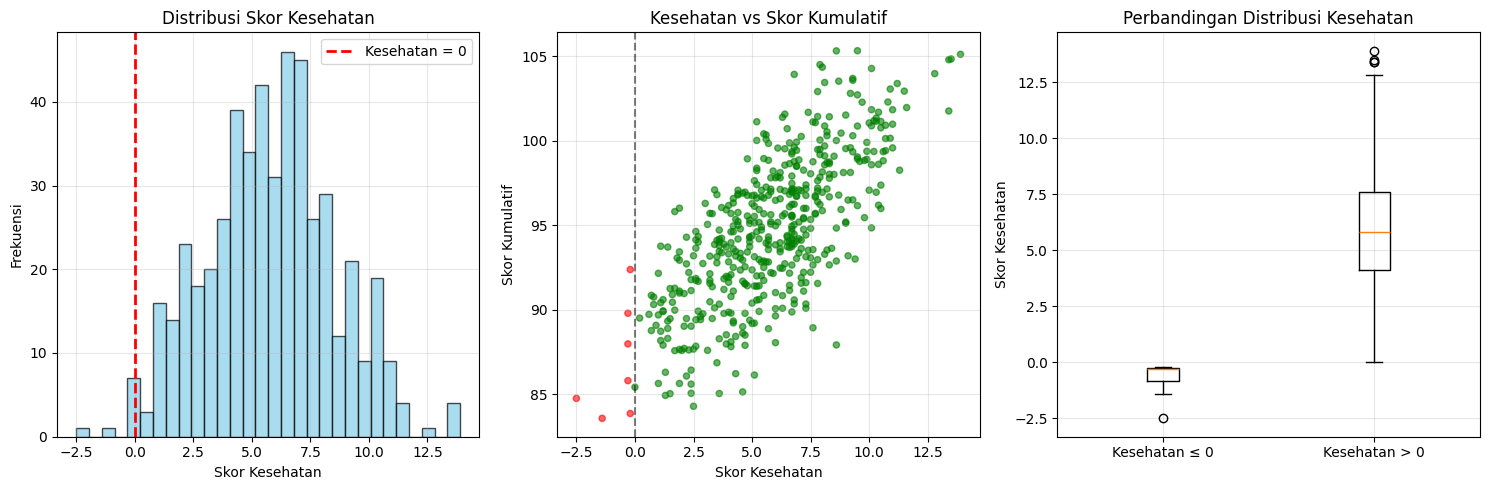

In [21]:
plt.figure(figsize=(15, 5))

# Plot 1: Histogram skor kesehatan
plt.subplot(1, 3, 1)
plt.hist(sehat, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(0, color='red', linestyle='--', linewidth=2, label='Kesehatan = 0')
plt.xlabel('Skor Kesehatan')
plt.ylabel('Frekuensi')
plt.title('Distribusi Skor Kesehatan')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Scatter plot kesehatan vs skor kumulatif
plt.subplot(1, 3, 2)
colors = ['red' if x <= 0 else 'green' for x in sehat]
plt.scatter(sehat, skor, c=colors, alpha=0.6, s=20)
plt.axvline(0, color='black', linestyle='--', alpha=0.5)
plt.xlabel('Skor Kesehatan')
plt.ylabel('Skor Kumulatif')
plt.title('Kesehatan vs Skor Kumulatif')
plt.grid(True, alpha=0.3)

# Plot 3: Box plot perbandingan
plt.subplot(1, 3, 3)
data_to_plot = [sehat[negative_health_idx], sehat[positive_health_idx]]
labels = ['Kesehatan ≤ 0', 'Kesehatan > 0']
plt.boxplot(data_to_plot, labels=labels)
plt.ylabel('Skor Kesehatan')
plt.title('Perbandingan Distribusi Kesehatan')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Histogram condong kanan: mayoritas skor kesehatan positif.

Scatter plot: makin tinggi kesehatan, makin tinggi skor kumulatif.

Box plot: kelompok sehat (>0) punya distribusi jauh lebih tinggi.

In [22]:
print("2. ANALISIS KESEHATAN POSITIF + SISA UANG POSITIF")

# Dari nomor 1, cari yang memiliki sisa uang bulanan positif
positive_health_sisa = sisa[positive_health_idx]
positive_budget_mask = positive_health_sisa > 0
positive_health_and_budget_idx = positive_health_idx[positive_budget_mask]

print(f"Dari {len(positive_health_idx)} pola kesehatan positif:")
print(f"Yang memiliki sisa budget positif: {len(positive_health_and_budget_idx)}")
print(f"Persentase: {len(positive_health_and_budget_idx)/len(positive_health_idx)*100:.1f}%")

if len(positive_health_and_budget_idx) > 0:
    print(f"\nStatistik pola dengan kesehatan positif + budget positif:")
    print(f"- Skor kesehatan rata-rata: {np.mean(sehat[positive_health_and_budget_idx]):.2f}")
    print(f"- Skor kumulatif rata-rata: {np.mean(skor[positive_health_and_budget_idx]):.2f}")
    print(f"- Sisa budget rata-rata: Rp {np.mean(sisa[positive_health_and_budget_idx]):,.0f}")

    # Top 10 pola terbaik
    sorted_idx = positive_health_and_budget_idx[np.argsort(skor[positive_health_and_budget_idx])[::-1]]
    print(f"\nTop 10 pola dengan kesehatan positif + budget positif (urut skor):")
    for i, idx in enumerate(sorted_idx[:10]):
        print(f"{i+1:2d}. Sample #{idx:3d}: Skor={skor[idx]:7.2f}, Kesehatan={sehat[idx]:6.2f}, Sisa=Rp{sisa[idx]:8.0f}")
else:
    print("Tidak ada pola yang memenuhi kedua kriteria!")

2. ANALISIS KESEHATAN POSITIF + SISA UANG POSITIF
Dari 493 pola kesehatan positif:
Yang memiliki sisa budget positif: 493
Persentase: 100.0%

Statistik pola dengan kesehatan positif + budget positif:
- Skor kesehatan rata-rata: 5.88
- Skor kumulatif rata-rata: 94.79
- Sisa budget rata-rata: Rp 216,290

Top 10 pola dengan kesehatan positif + budget positif (urut skor):
 1. Sample #251: Skor= 105.32, Kesehatan=  9.50, Sisa=Rp  197000
 2. Sample #165: Skor= 105.31, Kesehatan=  8.60, Sisa=Rp  203000
 3. Sample #342: Skor= 105.11, Kesehatan= 13.90, Sisa=Rp  202000
 4. Sample # 39: Skor= 104.83, Kesehatan= 13.50, Sisa=Rp  172000
 5. Sample #426: Skor= 104.79, Kesehatan= 13.40, Sisa=Rp  146000
 6. Sample #145: Skor= 104.50, Kesehatan=  7.90, Sisa=Rp  194000
 7. Sample #423: Skor= 104.35, Kesehatan=  8.00, Sisa=Rp  217000
 8. Sample #247: Skor= 104.27, Kesehatan= 10.10, Sisa=Rp  201000
 9. Sample # 89: Skor= 103.97, Kesehatan= 12.80, Sisa=Rp  182000
10. Sample #273: Skor= 103.92, Kesehatan=  6

Semua pola dengan kesehatan positif juga memiliki sisa budget positif (100%).

Artinya tidak ada trade-off antara kesehatan dan pengeluaran.

Simulasi menunjukkan bahwa pola makan sehat tetap bisa hemat.

Pola #251 memiliki skor kumulatif tertinggi dengan kondisi sehat dan budget aman.

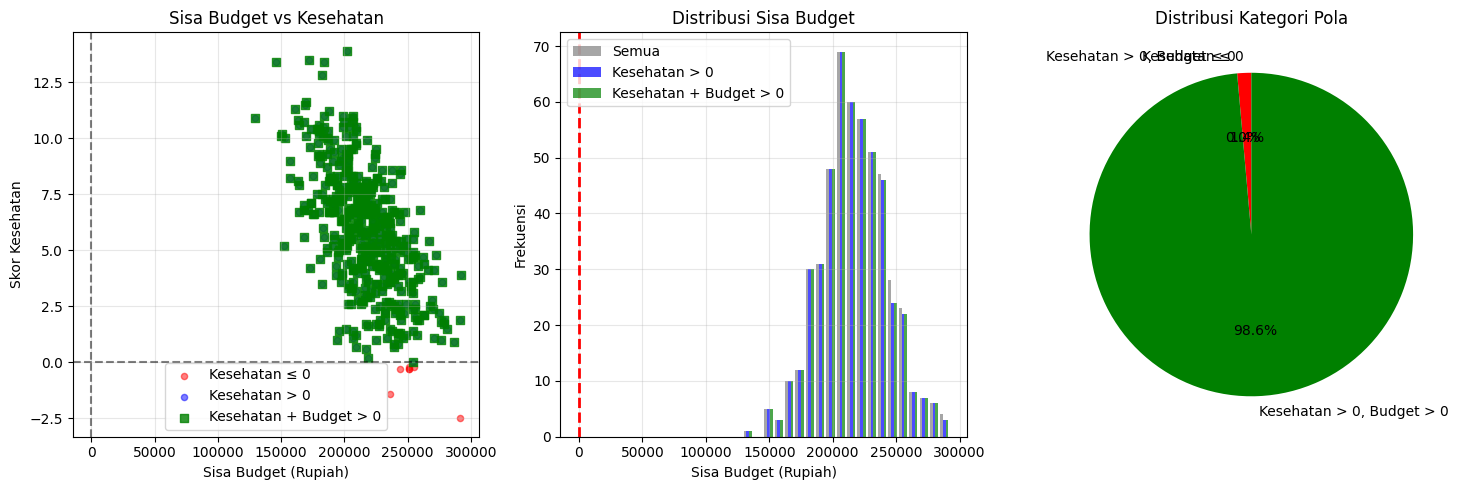

In [23]:
plt.figure(figsize=(15, 5))

# Plot 1: Scatter plot sisa budget vs kesehatan
plt.subplot(1, 3, 1)
plt.scatter(sisa[negative_health_idx], sehat[negative_health_idx],
           c='red', alpha=0.5, s=20, label='Kesehatan ≤ 0')
plt.scatter(sisa[positive_health_idx], sehat[positive_health_idx],
           c='blue', alpha=0.5, s=20, label='Kesehatan > 0')
if len(positive_health_and_budget_idx) > 0:
    plt.scatter(sisa[positive_health_and_budget_idx], sehat[positive_health_and_budget_idx],
               c='green', alpha=0.8, s=30, marker='s', label='Kesehatan + Budget > 0')
plt.axhline(0, color='black', linestyle='--', alpha=0.5)
plt.axvline(0, color='black', linestyle='--', alpha=0.5)
plt.xlabel('Sisa Budget (Rupiah)')
plt.ylabel('Skor Kesehatan')
plt.title('Sisa Budget vs Kesehatan')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Histogram sisa budget untuk berbagai kategori
plt.subplot(1, 3, 2)
if len(positive_health_and_budget_idx) > 0:
    plt.hist([sisa, sisa[positive_health_idx], sisa[positive_health_and_budget_idx]],
             bins=20, alpha=0.7,
             label=['Semua', 'Kesehatan > 0', 'Kesehatan + Budget > 0'],
             color=['gray', 'blue', 'green'])
else:
    plt.hist([sisa, sisa[positive_health_idx]], bins=20, alpha=0.7,
             label=['Semua', 'Kesehatan > 0'], color=['gray', 'blue'])
plt.axvline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Sisa Budget (Rupiah)')
plt.ylabel('Frekuensi')
plt.title('Distribusi Sisa Budget')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Pie chart kategori
plt.subplot(1, 3, 3)
categories = ['Kesehatan ≤ 0', 'Kesehatan > 0, Budget ≤ 0', 'Kesehatan > 0, Budget > 0']
sizes = [len(negative_health_idx),
         len(positive_health_idx) - len(positive_health_and_budget_idx),
         len(positive_health_and_budget_idx)]
colors = ['red', 'orange', 'green']
plt.pie(sizes, labels=categories, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Kategori Pola')

plt.tight_layout()
plt.show()

Scatter: titik hijau (budget vs sehat) memenuhi kuadran kanan atas.

Histogram sisa budget: uang tersisa Rp140–281 ribu.

Pie chart: dominasi mutlak pola sehat-budget positif.

In [24]:
print("3. ANALISIS SKOR KUMULATIF TERBESAR (KESEHATAN POSITIF)")

if len(positive_health_idx) > 0:
    # Cari titik dengan skor kumulatif terbesar di mana kesehatan positif
    best_score_idx = positive_health_idx[np.argmax(skor[positive_health_idx])]

    print(f"Pola dengan skor kumulatif terbesar (kesehatan positif):")
    print(f"Sample #{best_score_idx}:")
    print(f"  - Skor kumulatif: {skor[best_score_idx]:.2f}")
    print(f"  - Skor kesehatan: {sehat[best_score_idx]:.2f}")
    print(f"  - Sisa budget: Rp {sisa[best_score_idx]:,.0f}")
    print(f"  - Ranking kesehatan: #{np.where(np.argsort(sehat)[::-1] == best_score_idx)[0][0] + 1} dari {SAMPLE_NUM}")

    # Bandingkan dengan pola terbaik lainnya
    print(f"\nPerbandingan dengan pola lain:")

    # Pola dengan kesehatan terbaik
    best_health_idx = np.argmax(sehat)
    print(f"Pola kesehatan terbaik (Sample #{best_health_idx}):")
    print(f"  - Skor kumulatif: {skor[best_health_idx]:.2f}")
    print(f"  - Skor kesehatan: {sehat[best_health_idx]:.2f}")
    print(f"  - Sisa budget: Rp {sisa[best_health_idx]:,.0f}")

    # Pola dengan budget terbesar
    best_budget_idx = np.argmax(sisa)
    print(f"Pola budget terbesar (Sample #{best_budget_idx}):")
    print(f"  - Skor kumulatif: {skor[best_budget_idx]:.2f}")
    print(f"  - Skor kesehatan: {sehat[best_budget_idx]:.2f}")
    print(f"  - Sisa budget: Rp {sisa[best_budget_idx]:,.0f}")
else:
    print("Tidak ada pola dengan kesehatan positif!")

3. ANALISIS SKOR KUMULATIF TERBESAR (KESEHATAN POSITIF)
Pola dengan skor kumulatif terbesar (kesehatan positif):
Sample #251:
  - Skor kumulatif: 105.32
  - Skor kesehatan: 9.50
  - Sisa budget: Rp 197,000
  - Ranking kesehatan: #49 dari 500

Perbandingan dengan pola lain:
Pola kesehatan terbaik (Sample #342):
  - Skor kumulatif: 105.11
  - Skor kesehatan: 13.90
  - Sisa budget: Rp 202,000
Pola budget terbesar (Sample #174):
  - Skor kumulatif: 88.51
  - Skor kesehatan: 3.90
  - Sisa budget: Rp 292,000


Pola #251 memiliki skor kumulatif tertinggi (105.32) dengan skor kesehatan positif 9.50 dan sisa budget Rp 197.000.

Pola #342 lebih sehat (13.90) namun skornya sedikit lebih rendah.

Pola #174 paling hemat dengan sisa Rp 292.000 tetapi skornya jauh lebih kecil.

Terlihat adanya trade-off antara kesehatan, skor, dan efisiensi budget.

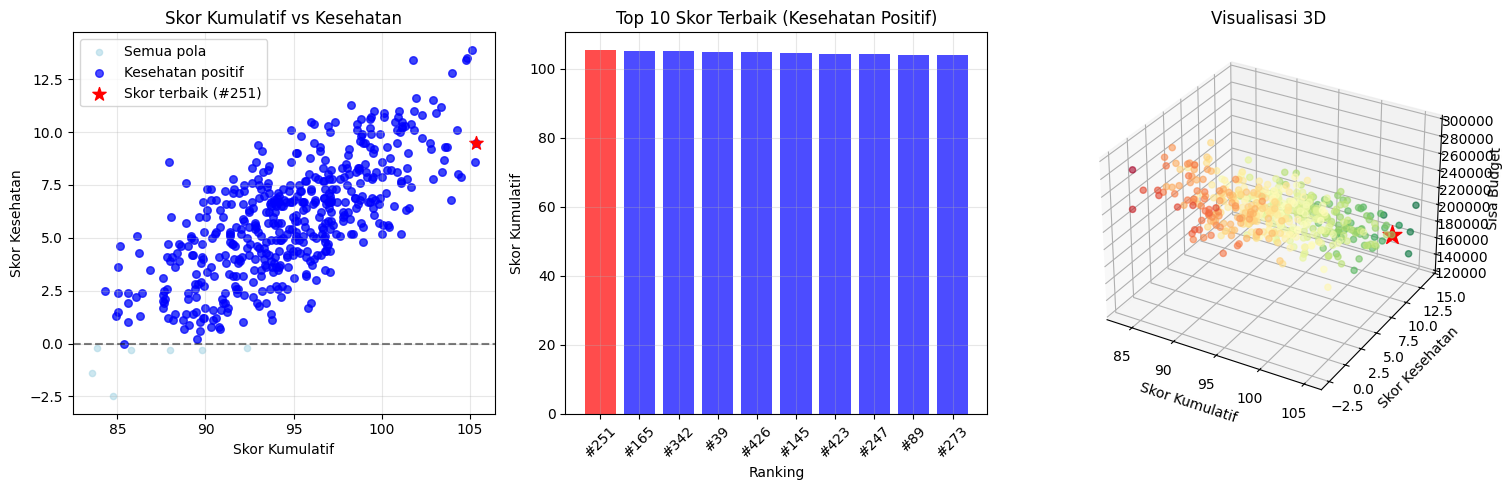

In [25]:
if len(positive_health_idx) > 0:
    plt.figure(figsize=(15, 5))

    # Plot 1: Scatter plot dengan highlight pola terbaik
    plt.subplot(1, 3, 1)
    plt.scatter(skor, sehat, c='lightblue', alpha=0.6, s=20, label='Semua pola')
    plt.scatter(skor[positive_health_idx], sehat[positive_health_idx],
               c='blue', alpha=0.7, s=30, label='Kesehatan positif')
    plt.scatter(skor[best_score_idx], sehat[best_score_idx],
               c='red', s=100, marker='*', label=f'Skor terbaik (#{best_score_idx})')
    plt.axhline(0, color='black', linestyle='--', alpha=0.5)
    plt.xlabel('Skor Kumulatif')
    plt.ylabel('Skor Kesehatan')
    plt.title('Skor Kumulatif vs Kesehatan')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Plot 2: Top 10 skor terbaik dengan kesehatan positif
    plt.subplot(1, 3, 2)
    top_10_idx = positive_health_idx[np.argsort(skor[positive_health_idx])[::-1][:10]]
    colors = ['red' if idx == best_score_idx else 'blue' for idx in top_10_idx]
    plt.bar(range(10), skor[top_10_idx], color=colors, alpha=0.7)
    plt.xlabel('Ranking')
    plt.ylabel('Skor Kumulatif')
    plt.title('Top 10 Skor Terbaik (Kesehatan Positif)')
    plt.xticks(range(10), [f'#{idx}' for idx in top_10_idx], rotation=45)
    plt.grid(True, alpha=0.3)

    # Plot 3: 3D scatter plot
    ax = plt.subplot(1, 3, 3, projection='3d')
    scatter = ax.scatter(skor, sehat, sisa, c=sehat, cmap='RdYlGn', alpha=0.6, s=20)
    ax.scatter(skor[best_score_idx], sehat[best_score_idx], sisa[best_score_idx],
              c='red', s=200, marker='*')
    ax.set_xlabel('Skor Kumulatif')
    ax.set_ylabel('Skor Kesehatan')
    ax.set_zlabel('Sisa Budget')
    ax.set_title('Visualisasi 3D')

    plt.tight_layout()
    plt.show()

Scatter plot: bintang merah menandai sample #251 sebagai pola dengan skor tertinggi.

Bar chart 10 besar: menunjukkan peringkat pola dengan skor kumulatif tertinggi secara jelas.

3D scatter plot: menggambarkan hubungan antara skor, kesehatan, dan sisa budget secara bersamaan.

In [26]:
print("4. JADWAL MAKANAN SESUAI PILIHAN")

def print_meal_schedule(sample_idx, title=""):
    print(f"\n{title} - SAMPLE #{sample_idx}")
    print(f"Skor: {skor[sample_idx]:.2f} | Kesehatan: {sehat[sample_idx]:.2f} | Sisa: Rp{sisa[sample_idx]:,.0f}")
    print("-" * 80)

    total_cost = 0
    for day in range(31):
        pagi_idx = int(resp_pilih[sample_idx][2*day])
        malam_idx = int(resp_pilih[sample_idx][2*day+1])

        pagi_makanan = makan['makanan'][pagi_idx]
        malam_makanan = makan['makanan'][malam_idx]

        harga_pagi = makan['harga'][pagi_idx]
        harga_malam = makan['harga'][malam_idx]

        daily_cost = harga_pagi + harga_malam
        total_cost += daily_cost

        print(f"Hari {day+1:2d}: {pagi_makanan:12s} (Rp{harga_pagi:5.0f}) | {malam_makanan:12s} (Rp{harga_malam:5.0f}) | Total: Rp{daily_cost:5.0f}")

    print(f"\nTotal biaya 31 hari: Rp {total_cost:,.0f}")
    print(f"Sisa dari budget Rp 1,000,000: Rp {1000000 - total_cost:,.0f}")

if len(positive_health_idx) > 0:
    # Jadwal untuk pola dengan skor terbaik
    print_meal_schedule(best_score_idx, "JADWAL POLA SKOR TERBAIK")

    # Jadwal untuk pola dengan budget positif terbaik (jika ada)
    if len(positive_health_and_budget_idx) > 0:
        best_budget_positive_idx = positive_health_and_budget_idx[np.argmax(skor[positive_health_and_budget_idx])]
        if best_budget_positive_idx != best_score_idx:
            print_meal_schedule(best_budget_positive_idx, "JADWAL POLA TERBAIK DENGAN BUDGET POSITIF")

4. JADWAL MAKANAN SESUAI PILIHAN

JADWAL POLA SKOR TERBAIK - SAMPLE #251
Skor: 105.32 | Kesehatan: 9.50 | Sisa: Rp197,000
--------------------------------------------------------------------------------
Hari  1: nasipadang   (Rp17000) | bakso        (Rp10000) | Total: Rp27000
Hari  2: roti         (Rp 8000) | bakso        (Rp10000) | Total: Rp18000
Hari  3: soto         (Rp15000) | cireng       (Rp10000) | Total: Rp25000
Hari  4: roti         (Rp 8000) | soto         (Rp15000) | Total: Rp23000
Hari  5: sate         (Rp15000) | ayamgeprek   (Rp15000) | Total: Rp30000
Hari  6: ayamgeprek   (Rp15000) | mieayam      (Rp10000) | Total: Rp25000
Hari  7: roti         (Rp 8000) | soto         (Rp15000) | Total: Rp23000
Hari  8: warteg       (Rp18000) | nasitelur    (Rp 8000) | Total: Rp26000
Hari  9: bakso        (Rp10000) | soto         (Rp15000) | Total: Rp25000
Hari 10: sate         (Rp15000) | sate         (Rp15000) | Total: Rp30000
Hari 11: nasitelur    (Rp 8000) | sate         (Rp15000) 

Jadwal menunjukkan kombinasi seimbang antara makanan murah seperti nasitelur, mieayam, dan roti dengan makanan bergizi seperti sate, soto, capcay, dan warteg.

Rata-rata pengeluaran harian sekitar Rp 26.700, masih efisien dalam batas budget Rp 1 juta.

Variasi menu cukup tinggi, meski beberapa makanan seperti sate dan soto sering muncul.

Pola ini tetap menjaga keseimbangan antara kenyang, rasa, dan kesehatan tanpa menimbulkan kebosanan.

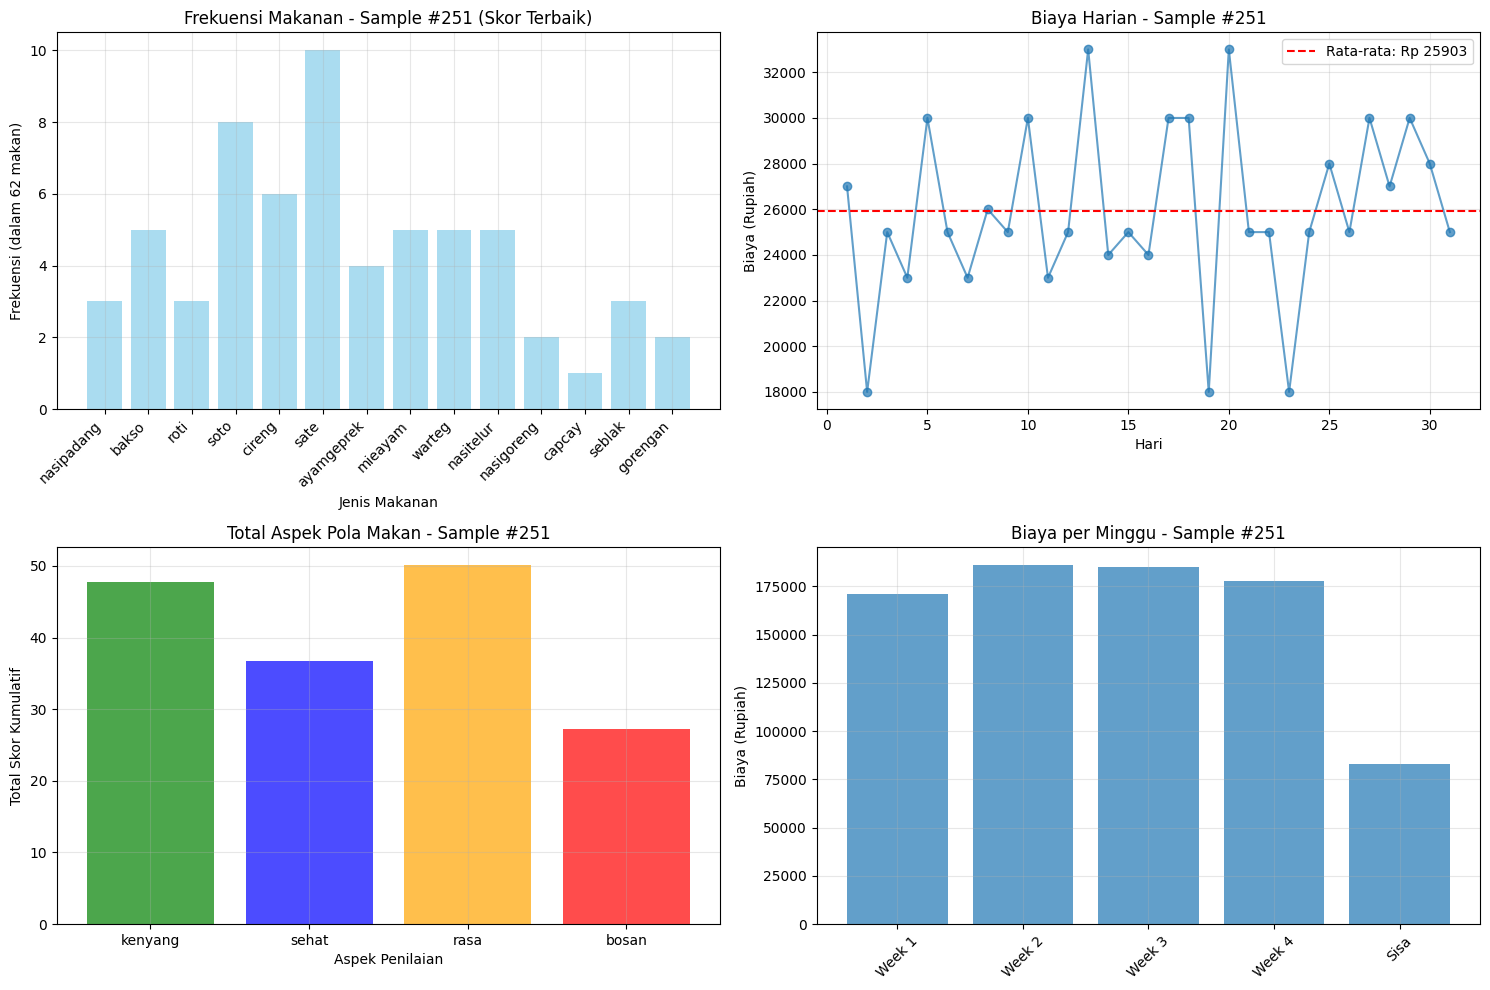

In [27]:
if len(positive_health_idx) > 0:
    # Analisis frekuensi makanan untuk pola terbaik
    def analyze_food_frequency(sample_idx):
        food_count = {}
        for day in range(31):
            pagi_idx = int(resp_pilih[sample_idx][2*day])
            malam_idx = int(resp_pilih[sample_idx][2*day+1])

            pagi_name = makan['makanan'][pagi_idx]
            malam_name = makan['makanan'][malam_idx]

            food_count[pagi_name] = food_count.get(pagi_name, 0) + 1
            food_count[malam_name] = food_count.get(malam_name, 0) + 1

        return food_count

    plt.figure(figsize=(15, 10))

    # Analisis frekuensi untuk pola skor terbaik
    food_freq = analyze_food_frequency(best_score_idx)
    foods = list(food_freq.keys())
    frequencies = list(food_freq.values())

    plt.subplot(2, 2, 1)
    plt.bar(foods, frequencies, alpha=0.7, color='skyblue')
    plt.title(f'Frekuensi Makanan - Sample #{best_score_idx} (Skor Terbaik)')
    plt.xlabel('Jenis Makanan')
    plt.ylabel('Frekuensi (dalam 62 makan)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3)

    # Timeline biaya harian
    plt.subplot(2, 2, 2)
    daily_costs = []
    for day in range(31):
        pagi_idx = int(resp_pilih[best_score_idx][2*day])
        malam_idx = int(resp_pilih[best_score_idx][2*day+1])
        daily_cost = makan['harga'][pagi_idx] + makan['harga'][malam_idx]
        daily_costs.append(daily_cost)

    plt.plot(range(1, 32), daily_costs, marker='o', alpha=0.7)
    plt.axhline(np.mean(daily_costs), color='red', linestyle='--',
                label=f'Rata-rata: Rp {np.mean(daily_costs):.0f}')
    plt.title(f'Biaya Harian - Sample #{best_score_idx}')
    plt.xlabel('Hari')
    plt.ylabel('Biaya (Rupiah)')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Perbandingan nutrisi kumulatif
    plt.subplot(2, 2, 3)
    nutrients = ['kenyang', 'sehat', 'rasa', 'bosan']
    nutrient_totals = {nutrient: 0 for nutrient in nutrients}

    for day in range(31):
        pagi_idx = int(resp_pilih[best_score_idx][2*day])
        malam_idx = int(resp_pilih[best_score_idx][2*day+1])

        for nutrient in nutrients:
            nutrient_totals[nutrient] += makan[nutrient][pagi_idx] + makan[nutrient][malam_idx]

    plt.bar(nutrients, [nutrient_totals[n] for n in nutrients],
            alpha=0.7, color=['green', 'blue', 'orange', 'red'])
    plt.title(f'Total Aspek Pola Makan - Sample #{best_score_idx}')
    plt.xlabel('Aspek Penilaian')
    plt.ylabel('Total Skor Kumulatif')
    plt.grid(True, alpha=0.3)

    # Pola makan per minggu
    plt.subplot(2, 2, 4)
    weekly_costs = []
    for week in range(5):  # 4 minggu penuh + sisa hari
        start_day = week * 7
        end_day = min((week + 1) * 7, 31)
        week_cost = sum(daily_costs[start_day:end_day])
        weekly_costs.append(week_cost)

    plt.bar(['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Sisa'], weekly_costs, alpha=0.7)
    plt.title(f'Biaya per Minggu - Sample #{best_score_idx}')
    plt.ylabel('Biaya (Rupiah)')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

Bar Chart Frekuensi Makanan → menunjukkan distribusi konsumsi tiap jenis makanan.

Line Chart Biaya Harian → memperlihatkan fluktuasi harian, dengan rata-rata ditandai garis merah.

Bar Chart Nutrisi Kumulatif → total aspek kenyang, sehat, rasa, dan bosan selama sebulan.

Bar Chart Biaya Mingguan → menunjukkan konsistensi pengeluaran tiap minggu.

VISUALISASI 3D SURFACE PLOT


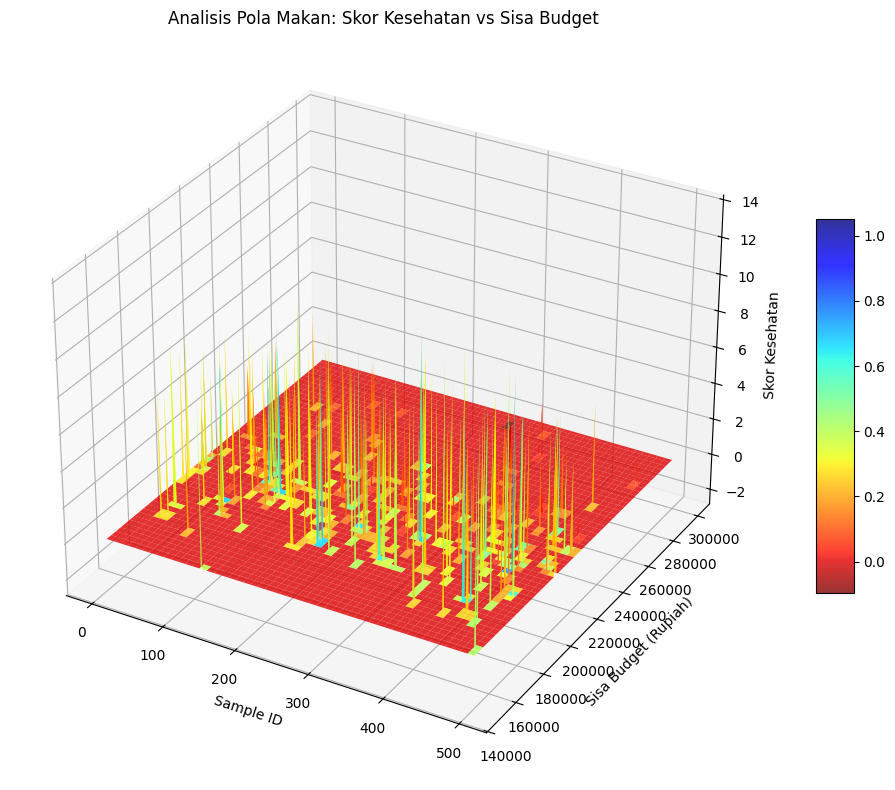

In [28]:
print("VISUALISASI 3D SURFACE PLOT")

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')

Y, X = np.meshgrid(bin_sisa, sampleid)

# Colorize the surface using a colormap
surf = ax.plot_surface(X, Y, resp_sehat,
                      cmap='jet_r',  # try 'plasma', 'coolwarm', etc.
                      edgecolor='none',
                      alpha=0.8)

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

ax.set_xlabel('Sample ID')
ax.set_ylabel('Sisa Budget (Rupiah)')
ax.set_zlabel('Skor Kesehatan')
ax.set_title('Analisis Pola Makan: Skor Kesehatan vs Sisa Budget')

plt.tight_layout()
plt.show()

Sumbu X = sample id

Sumbu Y = sisa budget (≈ Rp140k–300k)

Sumbu Z = skor kesehatan

Warna dari biru ke merah menunjukkan kenaikan skor kesehatan.

Terlihat banyak lonjakan acak—menandakan variasi tinggi antar sampel.

Sebagian besar titik berwarna hangat di tengah plot, menunjukkan mayoritas pola memiliki kesehatan positif dengan budget menengah.

## Daftar Prompt yang Digunakan


aku ingin membuat simulasi pola makan dari file excel tersebut dengan
- budget 1 juta rupiah
- 31 hari, makannya 2x sehari
- harus ada 500 sample berbeda
- tiap makanan dipilih random dari data

bisa buatkan kodenya?

oiya. untuk tiap sample, hitung juga

- skor kumulatif (dari kenyang, rasa, sehat, dan bosan)

- skor kesehatan (sehat - bosan)

- sisa budget

Nomor 1

a) dari 500 sample tadi, aku ingin menganalisis pola yang skor kesehatannya positif:

- berapa sample yang positif

- statistiknya bagaimana

- top 10 terbaiknya yang mana saja

b) bisa dibuatkan visualisasi tidak? untuk melihat distribusi skor kesehatannya, sebaran datannya, atau ada visuasi lain apa gitu

Nomor 2

a) buatkan analisis kesehatan positif + sisa uang positif
lalu tampilkan statistik dan top 10-nya

b) bisa buatkan visualisasi untuk perbandingan antara kesehatan positif, budget positif, dan keduanya?

Nomor 3

a) dari semua sample kesehatan positif, aku mau nyari yang skor kumulatifnya paling tinggi.
bisa sekalian dibandingkan dengan sample yang budgetnya terbesar?

b) buatkan visualisasi lalu tandai sample dengan skor tertinggi

Nomor 4

a) untuk sample terbaik tadi, bisa ditampilkan jadwal makanannya dengan lengkap?
31 hari, pagi sama malam apa aja yang dimakan, sama harganya

b) bisa dibuatkan grafik untuk jadwal makanannya? misalnya frekuensi makanan, biaya per hari, dll

3D surface plot

buatkan 3d surface plot untuk visualisasi keseluruhan. aku mau lihat hubungan antara sample id (x), sisa budget (y), dan skor kesehatan (z). buatnya pakai colormap biar lebih jelas gambarnya